In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Load: Load Punehome prices into a dataframe

In [2]:
df1 = pd.read_csv("Pune_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Alandi Road,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Ambegaon Budruk,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Anandnagar,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Aundh,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Aundh Road,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df1['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

### Drop features that are not required to build our model

In [5]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

# DATA CLEANING


In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

# FEATURE ENGINEERING

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_12712\2716584372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Gultekdi,4 BHK,2100 - 2850,4.0,186.000,4
122,Ganeshkhind,4 BHK,3067 - 8156,4.0,477.000,4
137,Khadaki,2 BHK,1042 - 1105,2.0,54.005,2
165,Prabhat Road,2 BHK,1145 - 1340,2.0,43.490,2
188,Wakadewadi,2 BHK,1015 - 1540,2.0,56.800,2
410,Ganeshkhind,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Prabhat Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Raviwar Peth,9 Bedroom,4125Perch,9.0,265.000,9
661,Tilak Road,2 BHK,1120 - 1145,2.0,48.130,2
672,Alandi Road,4 Bedroom,3090 - 5002,4.0,445.000,4


In [12]:
# we need to convert these range values to single value and drop other values


In [13]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [15]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3
3,Aundh,3 BHK,1521.0,3.0,95.00,3
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2
5,Balaji Nagar,2 BHK,1170.0,2.0,38.00,2
6,Baner,4 BHK,2732.0,4.0,204.00,4
7,Baner road,4 BHK,3300.0,4.0,600.00,4
8,Bhandarkar Road,3 BHK,1310.0,3.0,63.25,3
9,Bhavani Peth,6 Bedroom,1020.0,6.0,370.00,6


In [16]:
df4.loc[30]

location      Gultekdi
size             4 BHK
total_sqft      2475.0
bath               4.0
price            186.0
bhk                  4
Name: 30, dtype: object

In [18]:
# Adding new feature "price_per_sqft"

In [19]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Aundh,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [20]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Kasba Peth         139
Bibvewadi          139
Laxmi Road         139
Ambegaon Budruk    139
Nana Peth          139
                  ... 
Fatima Nagar       135
Model colony       135
Wakadewadi         134
Vadgaon Budruk     133
other                1
Name: count, Length: 97, dtype: int64

In [23]:
# unlike banglore we already have "other" as location so we dont need this step

In [24]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Aundh,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Balaji Nagar,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Baner,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Baner road,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Bhandarkar Road,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Bhavani Peth,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


# Outlier Removal Using Business Logic 

In [25]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Bhavani Peth,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,Kondhwa Budruk,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Mundhawa,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Pirangut,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Pune Railway Station,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [26]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [27]:
df6.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Ambegaon Budruk,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Anandnagar,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Aundh,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Aundh Road,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Balaji Nagar,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Baner,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Baner road,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Bhandarkar Road,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Bibvewadi,3 BHK,1800.0,2.0,70.00,3,3888.888889


In [57]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10883, 7)

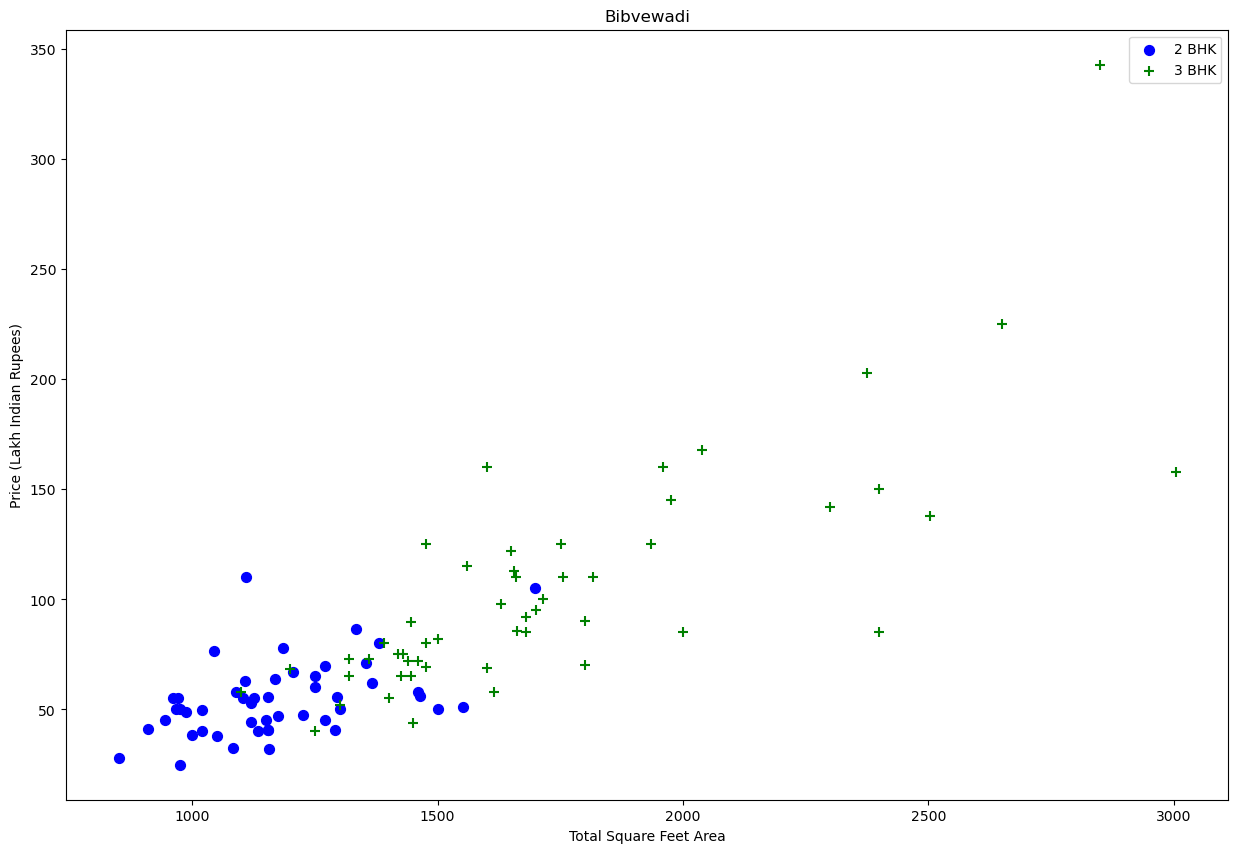

In [59]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Bibvewadi")

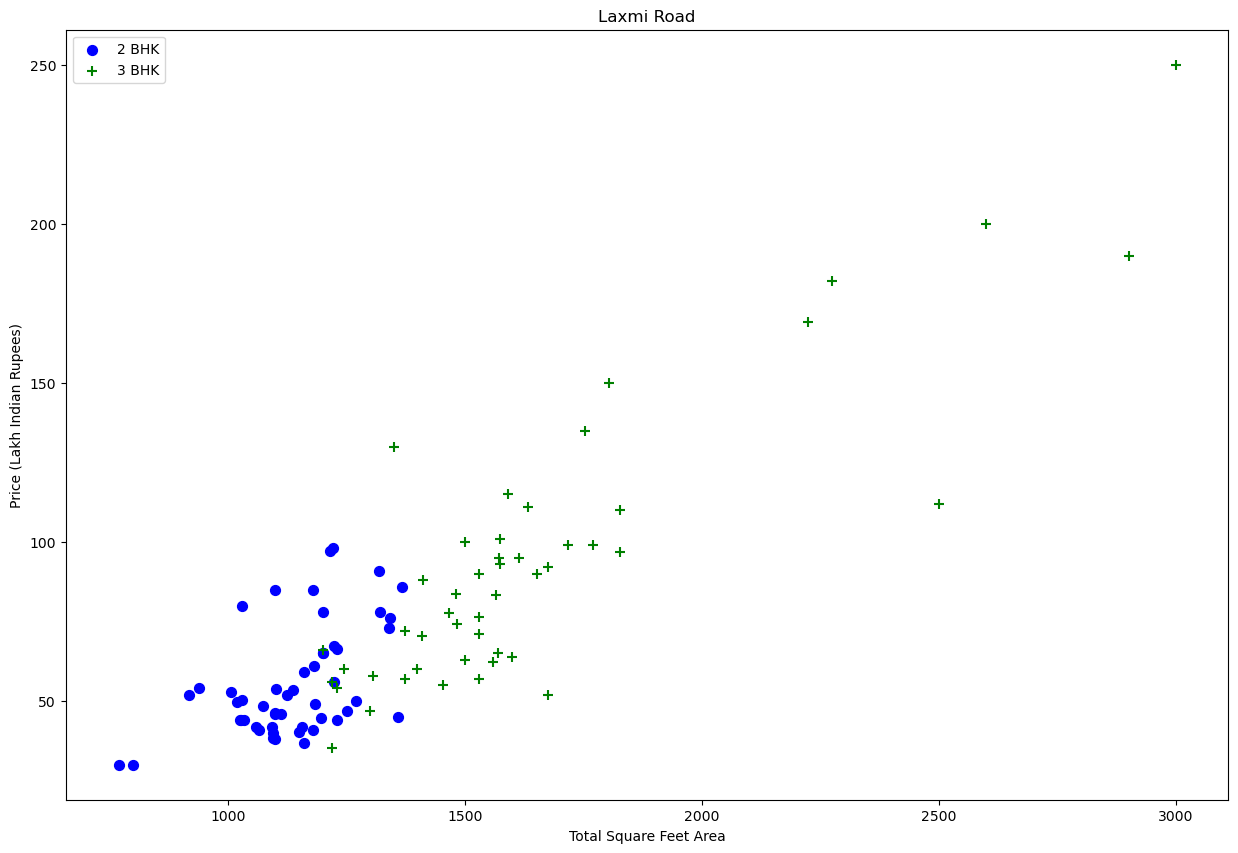

In [66]:
plot_scatter_chart(df7,"Laxmi Road")

In [67]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7543, 7)

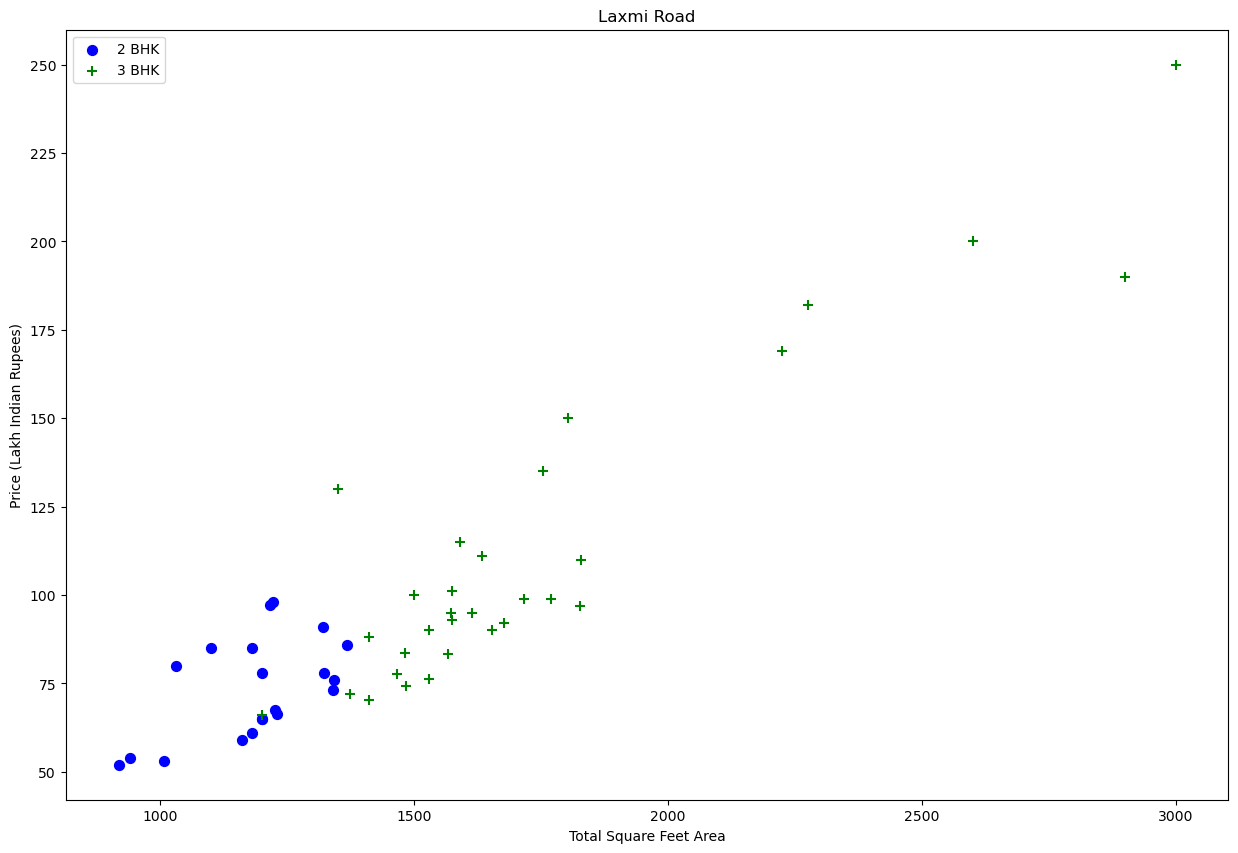

In [69]:
plot_scatter_chart(df8,"Laxmi Road")

Text(0, 0.5, 'Count')

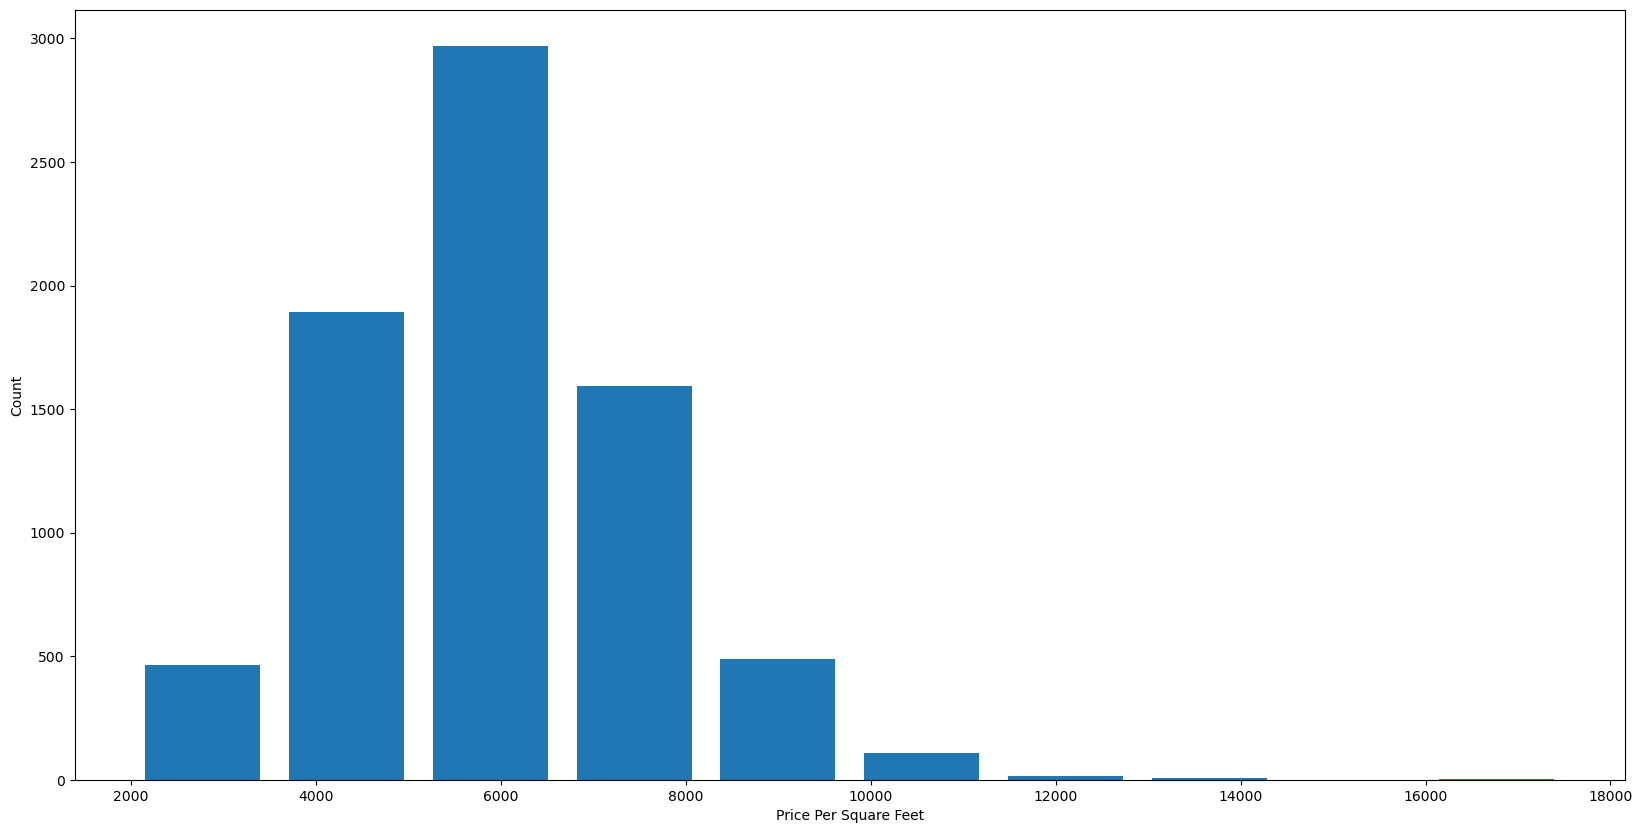

In [70]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [71]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1211,Bibvewadi,11 BHK,6000.0,12.0,150.0,11,2500.000000
2637,Fatima Nagar,10 BHK,12000.0,12.0,525.0,10,4375.000000
5265,Kondhwa Khurd,13 BHK,5425.0,13.0,275.0,13,5069.124424
6350,Model colony,16 BHK,10000.0,16.0,550.0,16,5500.000000
10389,Wagholi,10 BHK,4000.0,12.0,160.0,10,4000.000000


In [74]:
df8[df8.bath>df8.bhk+2] #how could no. of bathrooms be greater than no. of room itself....error....fix it

,location,size,total_sqft,bath,price,bhk,price_per_sqft
772,Baner,3 BHK,1806.0,6.0,116.0,3,6423.034330
3067,Ghorpade Peth,6 BHK,11338.0,9.0,1000.0,6,8819.897689
4231,Karve Nagar,4 Bedroom,7000.0,8.0,450.0,4,6428.571429


In [75]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 7)

In [77]:
df9.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Alandi Road,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Alandi Road,4 Bedroom,2894.0,4.0,245.00,4,8465.791292
2,Alandi Road,2 BHK,1084.0,2.0,50.00,2,4612.546125
3,Alandi Road,2 BHK,1230.0,2.0,80.00,2,6504.065041
4,Alandi Road,3 BHK,1750.0,3.0,130.00,3,7428.571429
5,Alandi Road,2 BHK,995.0,2.0,41.00,2,4120.603015
8,Alandi Road,2 BHK,1360.0,2.0,95.00,2,6985.294118
9,Alandi Road,2 BHK,1040.0,2.0,50.00,2,4807.692308
10,Alandi Road,3 BHK,1655.0,3.0,86.06,3,5200.000000
12,Alandi Road,4 BHK,2790.0,5.0,198.00,4,7096.774194


In [79]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,Alandi Road,1056.0,2.0,39.07,2
1,Alandi Road,2894.0,4.0,245.00,4
2,Alandi Road,1084.0,2.0,50.00,2
3,Alandi Road,1230.0,2.0,80.00,2
4,Alandi Road,1750.0,3.0,130.00,3


# Dummies for locations

In [80]:
dummies = pd.get_dummies(df10.location)
dummies.head(10)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
# in the for of 0s and 1s

In [82]:
dummies = pd.get_dummies(df10.location).astype(int)
dummies.head(10)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df11 = df10.copy()  

In [88]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,Alandi Road,1056.0,2.0,39.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alandi Road,2894.0,4.0,245.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alandi Road,1084.0,2.0,50.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alandi Road,1230.0,2.0,80.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alandi Road,1750.0,3.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df11.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road',
       ...
       'Uruli Devachi', 'Vadgaon Budruk', 'Viman Nagar', 'Vishrant Wadi',
       'Wadgaon Sheri', 'Wagholi', 'Wakadewadi', 'Wanowrie', 'Warje',
       'Yerawada'],
      dtype='object', length=101)

In [90]:
df11.head()

,location,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,Alandi Road,1056.0,2.0,39.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alandi Road,2894.0,4.0,245.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alandi Road,1084.0,2.0,50.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alandi Road,1230.0,2.0,80.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alandi Road,1750.0,3.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df12 = df11.drop('location',axis='columns')
df12.head(10)

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,995.0,2.0,41.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1360.0,2.0,95.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1040.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1655.0,3.0,86.06,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2790.0,5.0,198.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building


In [93]:
df12.shape

(7479, 100)

In [94]:
x = df12.drop(['price'],axis='columns')
x.head(10)

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,995.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1360.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1040.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1655.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,2790.0,5.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
y = df12.price
y.head(10)

0      39.07
1     245.00
2      50.00
3      80.00
4     130.00
5      41.00
8      95.00
9      50.00
10     86.06
12    198.00
Name: price, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [98]:
from sklearn.linear_model import LinearRegression
lr_clf_pune = LinearRegression()
lr_clf_pune.fit(X_train,y_train)
lr_clf_pune.score(X_test,y_test)

0.8234037699553769

In [99]:
# K-fold to check accuracy scores....


In [101]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87729294, 0.87158074, 0.80258828, 0.89763339, 0.81086632])

# Predict the cost

In [103]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    p = np.zeros(len(X.columns))
    p[0] = sqft
    p[1] = bath
    p[2] = bhk
    if loc_index >= 0:
        p[loc_index] = 1

    return lr_clf_pune.predict([p])[0]

In [104]:
predict_price('Laxmi Road',1000, 2, 2)

C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


60.185630798339844

In [105]:
predict_price('Laxmi Road',2000, 3, 4)

C:\Users\Rahul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


131.38867568969727

## Pickle files

In [107]:
import pickle
with open('pune_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf_pune,f)

## Json file

In [108]:
import json
columns = {
    'data_columns_pune' : [col.lower() for col in x.columns]
}
with open("columns_pune.json","w") as f:
    f.write(json.dumps(columns))